<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Linear-Regression-Analysis/blob/main/Linear_Regression_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
data_01 = pd.read_csv('https://raw.githubusercontent.com/UM1412/Data-Set/main/Regression01.csv')

In [21]:
data_01.head(3)

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421


In [22]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  200 non-null    float64
 1   feature2  200 non-null    float64
 2   feature3  200 non-null    float64
 3   target    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
data_01.describe()

,feature1,feature2,feature3,target
count,200.000000,200.000000,200.000000,200.000000
mean,0.019595,-0.045539,0.048697,4.323508
std,1.041478,1.057713,0.974019,97.258970
min,-2.915738,-2.983970,-2.272244,-257.063427
25%,-0.647775,-0.810995,-0.650268,-60.735485
50%,0.007320,0.013617,-0.078591,2.991268
75%,0.704479,0.680593,0.729907,76.404521
max,3.314304,2.676112,2.811878,290.546161


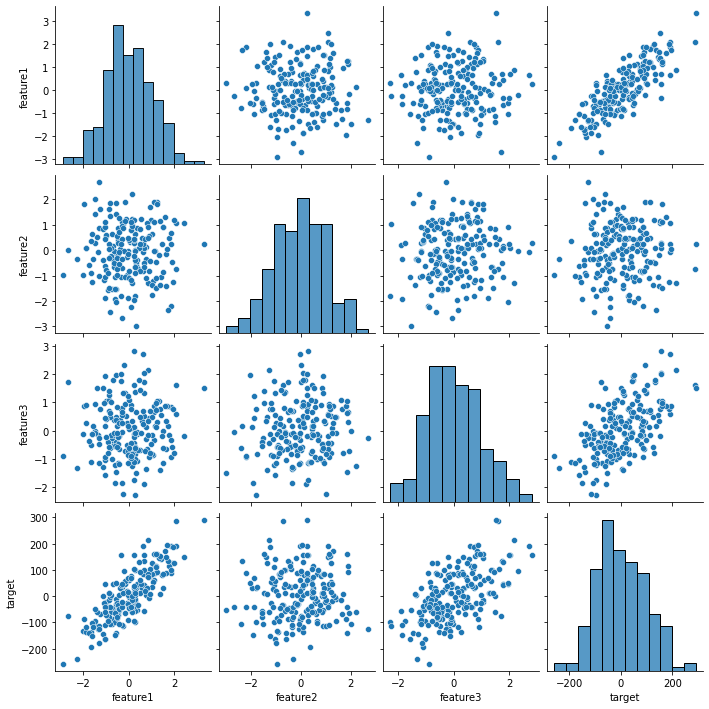

In [24]:
sns.pairplot(data_01);

In [25]:
X = data_01.iloc[:,0:3].values
y = data_01.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)
residual = y_test - y_pred

Linearity 

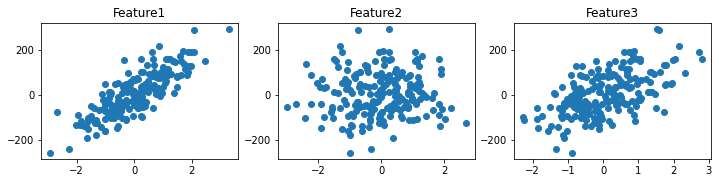

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))
ax1.scatter(data_01['feature1'], data_01['target'])
ax1.set_title("Feature1")
ax2.scatter(data_01['feature2'], data_01['target'])
ax2.set_title("Feature2")
ax3.scatter(data_01['feature3'], data_01['target'])
ax3.set_title("Feature3")
plt.show()

Multi-Collinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [31]:
pd.DataFrame({'vif': vif}, index=data_01.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


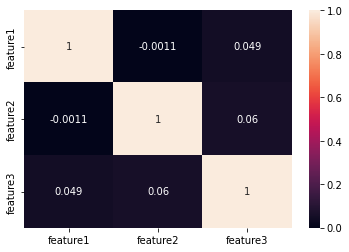

In [32]:
sns.heatmap(data_01.iloc[:,0:3].corr(),annot=True)

Normality 

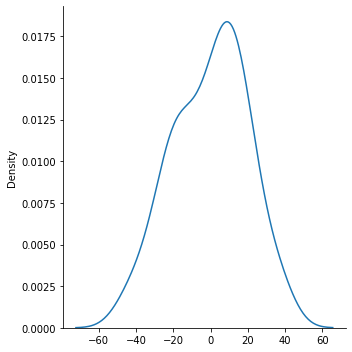

In [33]:
sns.displot(residual,kind='kde')

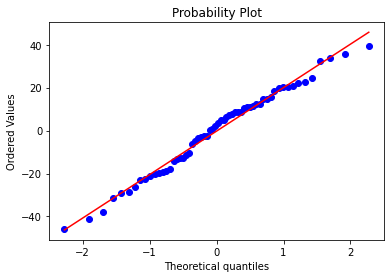

In [34]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

Homoscedasticity

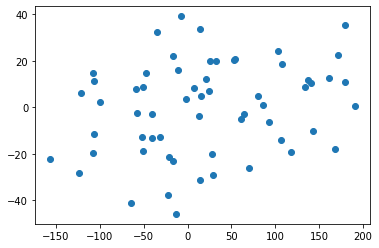

In [35]:
plt.scatter(y_pred,residual)

Auto-Correlation

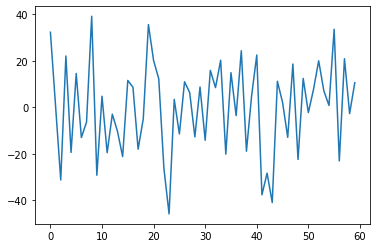

In [36]:
plt.plot(residual)